In [ ]:
#!pip3 install --user --upgrade google-cloud-texttospeech

In [ ]:
#!pip install --upgrade google-cloud-speech

In [ ]:
#!pip install google-cloud-speech

In [1]:
key_file = "dl-stfu-668ae575a084.json"

In [2]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file(key_file)


a useful link for the text to speach api in python
https://codelabs.developers.google.com/codelabs/cloud-text-speech-python3#6


In [20]:
import google.cloud.texttospeech as tts
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
import random
import string
import pandas as pd

In [21]:
def unique_languages_from_voices(voices):
    language_set = set()
    for voice in voices:
        for language_code in voice.language_codes:
            language_set.add(language_code)
    return language_set


def list_languages():
    client = tts.TextToSpeechClient(credentials=credentials) ##need credentials in every client.  annoying
    response = client.list_voices()
    languages = unique_languages_from_voices(response.voices)

    return languages
        
def list_voices(language_code=None):
    client = tts.TextToSpeechClient(credentials=credentials) ##ditto
    response = client.list_voices(language_code=language_code)
    voices = sorted(response.voices, key=lambda voice: voice.name)

    
    return [(voice.name, tts.SsmlVoiceGender(voice.ssml_gender).name) for voice in  voices]
     
        
def text_to_wav(voice_name: str, text: str, speaking_rate = 1.0, pitch = 0.0):
    #speaking rate can be between 0.25 and 4.0.  outside that is err
    #pitch can be between -20.0 and 20.0. but don't mess that much.
    #https://cloud.google.com/python/docs/reference/texttospeech/latest/google.cloud.texttospeech_v1.types.AudioConfig
    #effects_profile_id worth explorign
    language_code = "-".join(voice_name.split("-")[:2])
    text_input = tts.SynthesisInput(text=text)
    voice_params = tts.VoiceSelectionParams(
        language_code=language_code, name=voice_name
    )
    audio_config = tts.AudioConfig(audio_encoding=tts.AudioEncoding.LINEAR16
                                   ,speaking_rate=speaking_rate
                                   ,pitch=pitch)  ##this is where you get speed, pitch, etc.
    client = tts.TextToSpeechClient(credentials=credentials)
    response = client.synthesize_speech(
        input=text_input, voice=voice_params, audio_config=audio_config
    )

    filename = f"{language_code}.wav"
    with open(filename, "wb") as out:
        out.write(response.audio_content)
        print(f'Generated speech saved to "{filename}"')
        
def random_settings_text_to_wav( text: str, idx: int, label: bool, voice_list,profile_list):
    ##set these
    voice = random.choice(voice_list) #takes the list as i prepare it in list_voices
    voice_name = voice[0]
    gender = voice[1]
    
    speaking_rate = random.uniform(0.8,1.2) #do i need to reduce digits?
    pitch = random.uniform(-5,5)
    profile = random.choice(profile_list)
    print(gender, profile)
    #speaking rate can be between 0.25 and 4.0.  outside that is err
    #pitch can be between -20.0 and 20.0. but don't mess that much.
    #https://cloud.google.com/python/docs/reference/texttospeech/latest/google.cloud.texttospeech_v1.types.AudioConfig
    #effects_profile_id worth explorign
    
    language_code = "-".join(voice_name.split("-")[:2])
    text_input = tts.SynthesisInput(text=text)
    voice_params = tts.VoiceSelectionParams(
        language_code=language_code, name=voice_name, ssml_gender = gender
    )
    audio_config = tts.AudioConfig(audio_encoding=tts.AudioEncoding.LINEAR16
                                   ,speaking_rate=speaking_rate
                                   ,pitch=pitch
                                  , effects_profile_id = [profile] #this appears to be causing errors.
                                  )  ##this is where you get speed, pitch, etc.
    client = tts.TextToSpeechClient(credentials=credentials)
    response = client.synthesize_speech(
        input=text_input, voice=voice_params, audio_config=audio_config
    )
    code = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10)) 
    filename = f"{language_code}_{code}_{str(idx)}_{str(label)}.wav"
    #this needs to be written to a file somewhere. the text, the file name, and the spectrogram too.
    #save the file somewhere, record the file name, and save the spectrogram to numpy.  and save the labels.  cuss or not.  
    
    with open(filename, "wb") as out:
        out.write(response.audio_content)
        print(f'Generated speech saved to "{filename}"')

In [5]:
voice_list = list_voices(language_code="en-us")
voice_list

[('en-US-Neural2-A', 'MALE'),
 ('en-US-Neural2-C', 'FEMALE'),
 ('en-US-Neural2-D', 'MALE'),
 ('en-US-Neural2-E', 'FEMALE'),
 ('en-US-Neural2-F', 'FEMALE'),
 ('en-US-Neural2-G', 'FEMALE'),
 ('en-US-Neural2-H', 'FEMALE'),
 ('en-US-Neural2-I', 'MALE'),
 ('en-US-Neural2-J', 'MALE'),
 ('en-US-News-K', 'FEMALE'),
 ('en-US-News-L', 'FEMALE'),
 ('en-US-News-M', 'MALE'),
 ('en-US-News-N', 'MALE'),
 ('en-US-Standard-A', 'MALE'),
 ('en-US-Standard-B', 'MALE'),
 ('en-US-Standard-C', 'FEMALE'),
 ('en-US-Standard-D', 'MALE'),
 ('en-US-Standard-E', 'FEMALE'),
 ('en-US-Standard-F', 'FEMALE'),
 ('en-US-Standard-G', 'FEMALE'),
 ('en-US-Standard-H', 'FEMALE'),
 ('en-US-Standard-I', 'MALE'),
 ('en-US-Standard-J', 'MALE'),
 ('en-US-Studio-M', 'MALE'),
 ('en-US-Studio-O', 'FEMALE'),
 ('en-US-Wavenet-A', 'MALE'),
 ('en-US-Wavenet-B', 'MALE'),
 ('en-US-Wavenet-C', 'FEMALE'),
 ('en-US-Wavenet-D', 'MALE'),
 ('en-US-Wavenet-E', 'FEMALE'),
 ('en-US-Wavenet-F', 'FEMALE'),
 ('en-US-Wavenet-G', 'FEMALE'),
 ('en-US-W

In [6]:
profile_id_list = ['wearable-class-device'##	Smart watches and other wearables, like Apple Watch, Wear OS watch
,'handset-class-device'##	Smartphones, like Google Pixel, Samsung Galaxy, Apple iPhone
,'headphone-class-device'##	Earbuds or headphones for audio playback, like Sennheiser headphones
,'small-bluetooth-speaker-class-device'#	Small home speakers, like Google Home Mini
,'medium-bluetooth-speaker-class-device'#	Smart home speakers, like Google Home
,'large-home-entertainment-class-device'#	Home entertainment systems or smart TVs, like Google Home Max, LG TV
,'large-automotive-class-device'#	Car speakers
,'telephony-class-application'#	Interactive Voice Response (IVR) systems
]

In [42]:
cuss_text = "This has cusswords as well as three.  piss butt bitch!"
random_settings_text_to_wav( cuss_text, 0,True,voice_list,profile_id_list)

MALE medium-bluetooth-speaker-class-device
Generated speech saved to "en-US_3AC0C8Z3HA_0_True.wav"


In [ ]:
#https://stackoverflow.com/questions/44787437/how-to-convert-a-wav-file-to-a-spectrogram-in-python3

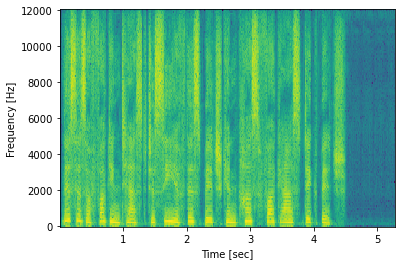

In [26]:


sample_rate, samples = wavfile.read('en-US_U6FL7NSHUY_1_True.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, np.log(spectrogram)) ##log makes it prettier. for whatever reason.
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [27]:
sample_rate,samples

(24000, array([ 0,  0,  0, ..., -2,  4,  6], dtype=int16))

In [28]:
spectrogram, np.log(spectrogram) ##which do we do it on?

(array([[1.4099558e-01, 6.9595985e-02, 2.6375163e-02, ..., 3.0329780e-05,
         3.4797773e-05, 8.5055584e-04],
        [1.0963779e+01, 9.6282682e+00, 1.4592891e+00, ..., 1.2015836e-02,
         4.3108437e-02, 2.5394166e-01],
        [9.1724418e-02, 3.4440368e-01, 3.3585680e-01, ..., 2.5152290e-02,
         2.8376039e-02, 8.7106340e-02],
        ...,
        [1.5930189e-03, 1.3988838e-04, 3.5212950e-05, ..., 1.6579806e-03,
         5.1156566e-03, 1.0595517e-02],
        [1.1625250e-03, 7.8762714e-05, 9.2712244e-06, ..., 7.4304279e-04,
         2.9111854e-03, 4.8299357e-03],
        [2.2048761e-04, 9.9092438e-05, 2.3699400e-05, ..., 9.4361485e-06,
         1.0128258e-05, 1.7261731e-03]], dtype=float32),
 array([[ -1.9590268,  -2.6650484,  -3.6353326, ..., -10.40338  ,
         -10.265957 ,  -7.0696206],
        [  2.394597 ,   2.2647033,   0.3779494, ...,  -4.42153  ,
          -3.1440365,  -1.3706508],
        [ -2.3889666,  -1.0659409,  -1.0910704, ...,  -3.6828063,
          -3.562

In [29]:
spectrogram.shape ##first axis is constant, second axis is time.

(129, 566)

In [35]:
spectrogram[:,-20:].shape

(129, 20)

In [34]:
x = [1,2,3,4,5]
x[-2:]

[4, 5]

In [ ]:
#for streaming later
#https://stackoverflow.com/questions/43353172/producing-spectrogram-from-microphone

In [43]:
##data loader
"""
making a few files, then i will zip em.  data loader will start with an unzip and a dataframe from csv
This block is just a test file, the csv comes from nicks process
"""

file_list = ['en-US_3AC0C8Z3HA_0_True.wav'
          ,'en-US_U6FL7NSHUY_1_True.wav'
          ,'en-US_XP64HR8BAN_2_False.wav'
          ,'en-US_PCALFJPAAU_3_True.wav'
          ,'en-US_W1998PGPS2_4_True.wav']
file_id = [0,1,2,3,4] #corresponds to the file list id.  this is redundancy babay
file_label = [True,True, False, True, True] #ditto

df_loader = pd.DataFrame(list(zip(file_list,file_label)), index = file_id, columns = ['file_name','label'])
df_loader.head()

,file_name,label
0,en-US_3AC0C8Z3HA_0_True.wav,True
1,en-US_U6FL7NSHUY_1_True.wav,True
2,en-US_XP64HR8BAN_2_False.wav,False
3,en-US_PCALFJPAAU_3_True.wav,True
4,en-US_W1998PGPS2_4_True.wav,True


In [44]:
df_loader.loc[1, 'file_name']

'en-US_U6FL7NSHUY_1_True.wav'

In [47]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, df, input_time_steps,right_trim_time_steps):
        self.df = df
        self.input_time_steps = input_time_steps
        self.right_trim_time_steps = right_trim_time_steps
        
    def __len__(self):
        return len(self.df) #works
    
    def __getitem__(self, index):
        file_name = self.df.loc[index, 'file_name']
        label = self.df.loc[index, 'label'] #this is binary right now.  
        sample_rate, samples = wavfile.read(file_name)
        _, _, spectrogram = signal.spectrogram(samples, sample_rate)
        spetrogram = spectrogram[:,:-self.right_trim_time_steps] #this is how many to shave off the end. 
        data = torch.from_numpy(spectrogram[:,-self.input_time_steps:]) #the value for time steps is the last x.  20 time steps means last 20
        return data, label
    
def get_dataloader(df, batch_size,input_time_steps,right_trim_time_steps):
    dataset = CustomDataset(df,input_time_steps,right_trim_time_steps)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

In [49]:
df = df_loader
batch_size = 2
dataloader = get_dataloader(df, batch_size,100,2)

for epoch in range(3):
    for batch_idx, (data, labels) in enumerate(dataloader):
        print(data.shape)

torch.Size([2, 129, 100])
torch.Size([2, 129, 100])
torch.Size([1, 129, 100])
torch.Size([2, 129, 100])
torch.Size([2, 129, 100])
torch.Size([1, 129, 100])
torch.Size([2, 129, 100])
torch.Size([2, 129, 100])
torch.Size([1, 129, 100])
